In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean,inf,arange
from numpy import std,var
from pandas import read_csv
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, plot_confusion_matrix, accuracy_score

In [27]:
scaler = StandardScaler()

In [28]:
df = pd.read_csv('../../../data/dataset.csv')

In [29]:
def get_new_target(col):
    return 1 if col == 'V' else 0

In [30]:
df['new_target'] = df['liverpool_result_ft'].apply(get_new_target)

In [31]:
y = df['liverpool_result_ft']

In [32]:
y_new = df['new_target']

In [33]:
x = df.drop(columns=['liverpool_result_ft','new_target'])

In [34]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_new,test_size = 0.3)

# Binary Classifier

## LDA

In [36]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.606 (0.046)


In [37]:
# define grid
grid = dict()
grid['solver'] = ['lsqr']
grid['shrinkage'] = arange(0, 1, 0.1)
#grid['n_components'] = arange(2,6,1)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [38]:
search.fit(x_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'solver': ['lsqr']},
             scoring='accuracy')

In [39]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

In [40]:
best_lda = search.best_estimator_

In [56]:
y_lda_predict = best_lda.predict_proba(x_test)

In [42]:
len(x_train)

242

In [43]:
len(x_test)

104

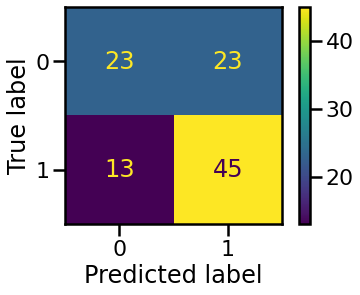

In [44]:
plot_confusion_matrix(best_lda,x_test,y_test)

In [45]:
accuracy_score(y_test,y_lda_predict)

0.6538461538461539

In [46]:
print(classification_report(y_test,y_lda_predict))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        46
           1       0.66      0.78      0.71        58

    accuracy                           0.65       104
   macro avg       0.65      0.64      0.64       104
weighted avg       0.65      0.65      0.65       104



Text(0, 0.5, 'Accuracy')

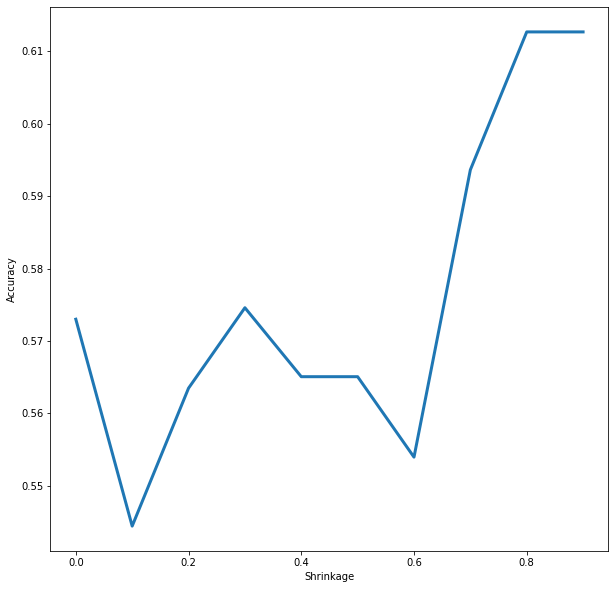

In [22]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_shrinkage', y='mean_test_score',data=res,markers='o')
plt.xlabel('Shrinkage')
plt.ylabel('Accuracy')

## Gaussian Naive Bayes

In [47]:
model_nb = GaussianNB()

In [48]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [57]:
y_nb_predict = model_nb.predict_proba(x_test)

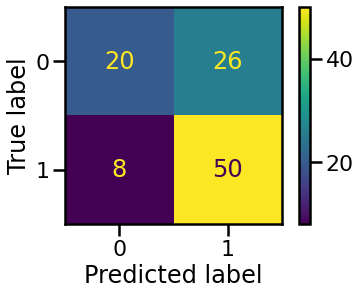

In [50]:
plot_confusion_matrix(model_nb,x_test,y_test)

In [51]:
print(classification_report(y_test,y_nb_predict))

              precision    recall  f1-score   support

           0       0.71      0.43      0.54        46
           1       0.66      0.86      0.75        58

    accuracy                           0.67       104
   macro avg       0.69      0.65      0.64       104
weighted avg       0.68      0.67      0.66       104



# ROC and AUC

In [63]:
y_lda_predict = y_lda_predict[:,1]

In [64]:
lda_fpr, lda_tpr, thresh = roc_curve(y_test,y_lda_predict)

In [65]:
auc_lda = auc(lda_fpr,lda_tpr)

In [66]:
y_nb_predict = y_nb_predict[:,1]

In [67]:
nb_fpr,nb_tpr,thresh_ = roc_curve(y_test,y_nb_predict)
auc_nb = auc(nb_fpr,nb_tpr)

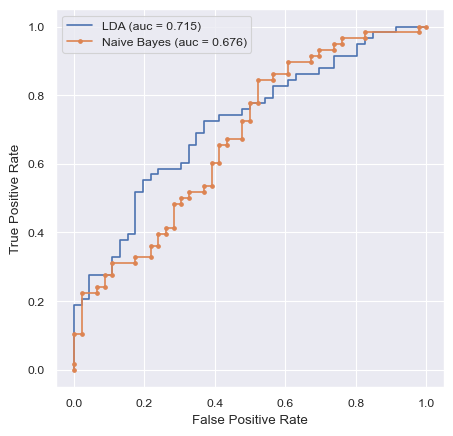

In [73]:
sns.set_theme()
sns.set_context('paper')
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lda_fpr, lda_tpr, linestyle='-', label='LDA (auc = %0.3f)' % auc_lda)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % auc_nb)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_auc_probabilistic_models.png')

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.3)

# Multiclass Classifier

## LDA

In [75]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.606 (0.046)


In [76]:
# define grid
grid = dict()
grid['solver'] = ['lsqr']
grid['shrinkage'] = arange(0, 1, 0.1)
#grid['n_components'] = arange(2,6,1)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [77]:
search.fit(x_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'solver': ['lsqr']},
             scoring='accuracy')

In [78]:
res =pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

In [79]:
best_lda = search.best_estimator_

In [87]:
y_lda_predict = best_lda.predict(x_test)

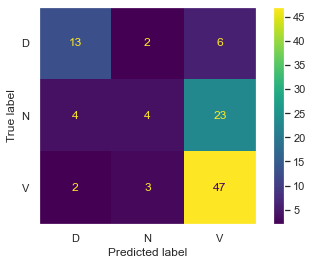

In [85]:
sns.set_style("dark")
plot_confusion_matrix(best_lda,x_test,y_test)

In [88]:
accuracy_score(y_test,y_lda_predict)

0.6153846153846154

In [89]:
print(classification_report(y_test,y_lda_predict))

              precision    recall  f1-score   support

           D       0.68      0.62      0.65        21
           N       0.44      0.13      0.20        31
           V       0.62      0.90      0.73        52

    accuracy                           0.62       104
   macro avg       0.58      0.55      0.53       104
weighted avg       0.58      0.62      0.56       104



## Gaussian Naive Bayes

In [90]:
model_nb = GaussianNB()

In [91]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [92]:
y_nb_predict = model_nb.predict(x_test)

In [96]:
round(accuracy_score(y_test,y_nb_predict),3)

0.51

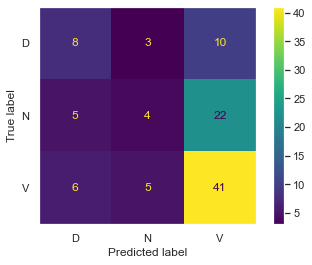

In [93]:
plot_confusion_matrix(model_nb,x_test,y_test)

In [94]:
print(classification_report(y_test,y_nb_predict))

              precision    recall  f1-score   support

           D       0.42      0.38      0.40        21
           N       0.33      0.13      0.19        31
           V       0.56      0.79      0.66        52

    accuracy                           0.51       104
   macro avg       0.44      0.43      0.41       104
weighted avg       0.47      0.51      0.46       104

